In [39]:
import numpy as np
import pandas as pd
import scipy.signal as sig
import matplotlib.pyplot as plt

import flim_chemistry as fc

In [6]:
radius_particle = 454.5e-6

In [29]:
current_profiles = pd.read_csv(r"D:\[Code]\paper01\data\peak_current_profiles.csv")
flow_profiles = pd.read_csv(r"D:\[Code]\paper01\data\peak_flow_profiles.csv")
time_profiles = pd.read_csv(r"D:\[Code]\paper01\data\peak_time_profiles.csv")

In [42]:
flow_model_path = r"data/flow_model_profiles.csv"
flow_model = pd.read_csv(flow_model_path, sep="\t", names=["x", "ph"], skiprows=[0])
flow_model_indices = flow_model[flow_model.x == 0].index
flow_model["c"] = fc.ph2ohminus(flow_model.ph) - fc.ph2ohminus(7)
flow_model.head()

,x,ph,c
0,0.000000,7.5903,2.893140e-07
1,0.014038,7.5904,2.894036e-07
2,0.021057,7.5905,2.894933e-07
3,0.037902,7.5913,2.902114e-07
4,0.046324,7.5917,2.905710e-07


In [43]:
current_model_path = r"data/current_model_profiles.csv"
current_model = pd.read_csv(current_model_path, sep="\t", names=["x", "ph"], skiprows=[0])
current_model_indices = current_model[current_model.x == 0].index
current_model["c"] = fc.ph2ohminus(current_model.ph) - fc.ph2ohminus(7)
current_model.head()

,x,ph,c
0,0.000000,7.0,0.0
1,0.014038,7.0,0.0
2,0.021057,7.0,0.0
3,0.037902,7.0,0.0
4,0.046324,7.0,0.0


(0.0, 14.916638925619012)

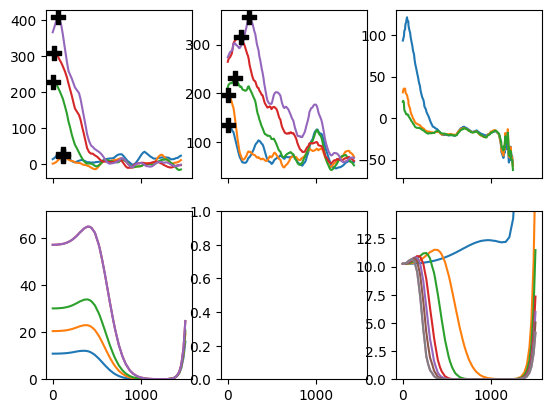

In [82]:
fig, axes = plt.subplots(2, 3, sharex=True)

ax = axes.ravel()[0]
for i_current, current in enumerate(
    current_profiles.sort_values("current").current.unique()
):
    d = current_profiles.query("current == @current").copy()
    peaks, properties = sig.find_peaks(
        d["rolled_values"].values[:50],
        height=d["rolled_values"].max() * 0.8,
        prominence=1e-18,
    )
    try:
        peak = peaks[np.argmax(properties["prominences"])]
        peak_loc = d.r.values[peak]
        peak_value = properties["peak_heights"][np.argmax(properties["prominences"])]
    except ValueError as e:
        peak_loc = 0
        peak_value = d["rolled_values"].values[0]
    ax.plot(d.r, d["rolled_values"] * 1e6, label=f"{i:.2f}")
    ax.scatter(peak_loc, peak_value * 1e6, color="black", marker="P", s=100, zorder=99)

ax = axes.ravel()[1]
indices_time = [25, 32, 96, 119, 150]
for i_time, time in enumerate(time_profiles.time.unique()):
    if i_time not in indices_time:
        continue
    d = time_profiles.query("time == @time").copy()
    peaks, properties = sig.find_peaks(
        d["rolled_values"].values[:50],
        height=d["rolled_values"].max() * 0.8,
        prominence=1e-18,
    )
    try:
        peak = peaks[np.argmax(properties["prominences"])]
        peak_loc = d.r.values[peak]
        peak_value = properties["peak_heights"][np.argmax(properties["prominences"])]
    except ValueError as e:
        peak_loc = 0
        peak_value = d["rolled_values"].values[0]
    ax.plot(d.r, d["rolled_values"] * 1e6)
    ax.scatter(peak_loc, peak_value * 1e6, color="black", marker="P", s=100, zorder=99)

ax = axes.ravel()[2]
indices_Re = [0, 3, 7]
for i_Re, Re in enumerate(flow_profiles.sort_values("Re").Re.unique()):
    if i_Re not in indices_Re:
        continue

    d = flow_profiles.query("Re == @Re").copy()
    peaks, properties = sig.find_peaks(
        d["rolled_values"].values[:50],
        height=d["rolled_values"].max() * 0.8,
        prominence=1e-18,
    )
    try:
        peak = peaks[np.argmax(properties["prominences"])]
        peak_loc = d.r.values[peak]
        peak_value = properties["peak_heights"][np.argmax(properties["prominences"])]
    except ValueError as e:
        peak_loc = 0
        peak_value = d["rolled_values"].values[0]
    ax.plot(
        d.r.to_numpy(),
        d["rolled_values"].to_numpy() * 1e6,
    )


ax = axes.ravel()[3]
for i_current in range(len(current_model_indices)):
    try:
        current_model_d = current_model.iloc[
            current_model_indices[i_current] : current_model_indices[i_current + 1]
        ]
    except IndexError as e:
        current_model.iloc[current_model_indices[i_current] :]

    ax.plot(
        (current_model_d.query("x > 2").x - 2.5) * 1e3,
        current_model_d.query("x > 2").c * 1e6,
    )
ax.set_ylim(0, 1.1 * current_model_d.query("x > 2 and x < 3.5").c.max() * 1e6)


ax = axes.ravel()[5]
for i_flow in range(len(flow_model_indices)):
    try:
        flow_model_d = flow_model.iloc[
            flow_model_indices[i_flow] : flow_model_indices[i_flow + 1]
        ]
    except IndexError as e:
        flow_model.iloc[flow_model_indices[i_flow] :]

    ax.plot(
        (flow_model_d.query("x > 2").x - 2.5) * 1e3,
        flow_model_d.query("x > 2").c * 1e6,
    )
ax.set_ylim(0, 1.4 * flow_model_d.query("x > 2 and x < 3.9").c.max() * 1e6)